In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
data = pd.read_csv('/content/forestfires.csv')

data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [3]:
data.shape

(517, 13)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [5]:
data.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [6]:
data.isnull().sum()

,0
X,0
Y,0
month,0
day,0
FFMC,0
DMC,0
DC,0
ISI,0
temp,0
RH,0


In [7]:
data.duplicated().sum()

4

In [8]:
data.drop_duplicates()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


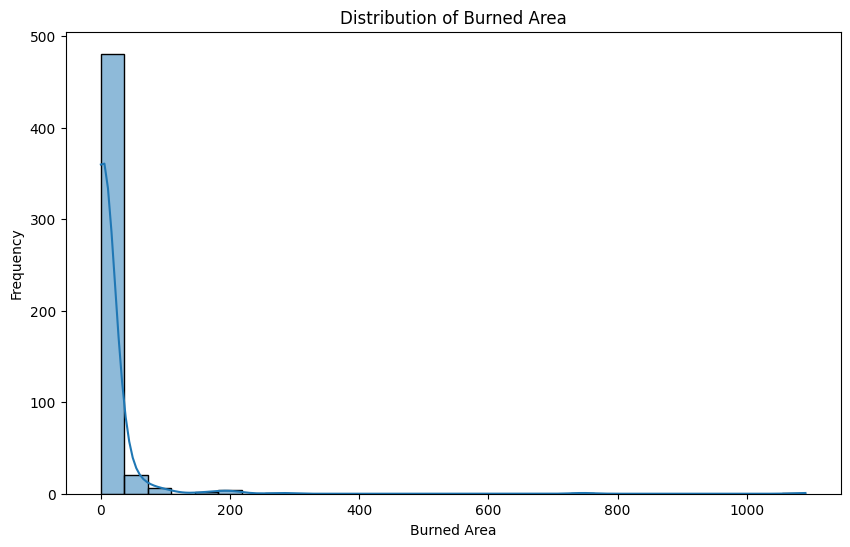

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(data['area'], bins=30, kde=True)
plt.title('Distribution of Burned Area')
plt.xlabel('Burned Area')
plt.ylabel('Frequency')
plt.show()

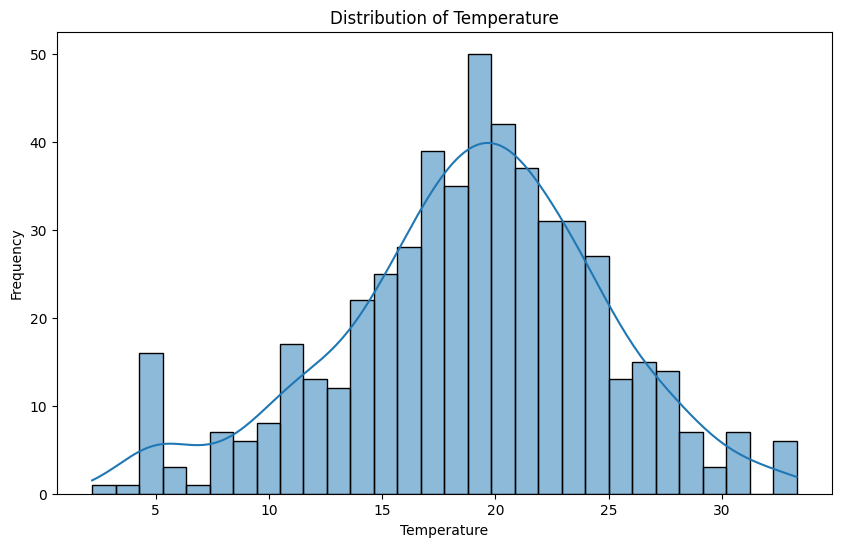

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(data['temp'], bins=30, kde=True)
plt.title('Distribution of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

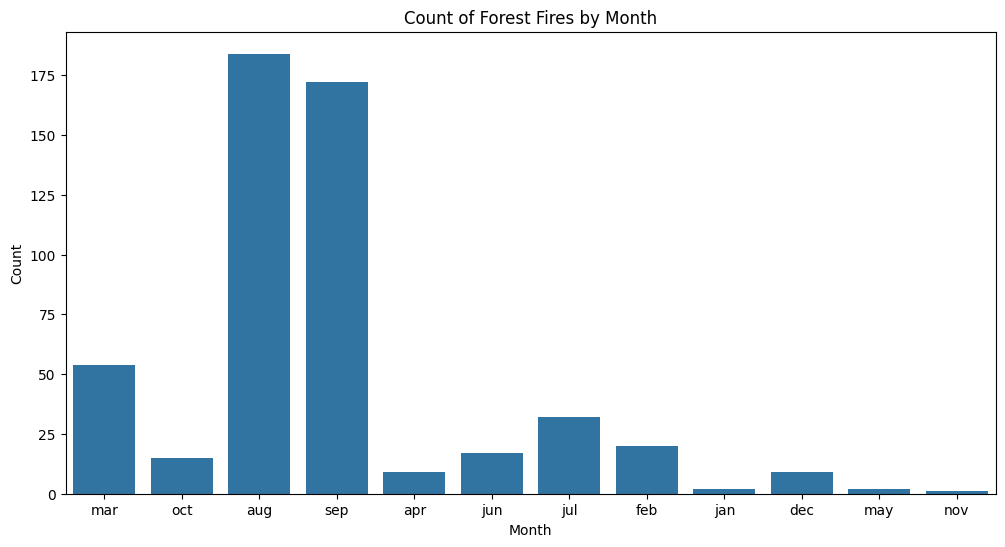

In [11]:
plt.figure(figsize=(12, 6))
sns.countplot(x='month', data=data)
plt.title('Count of Forest Fires by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

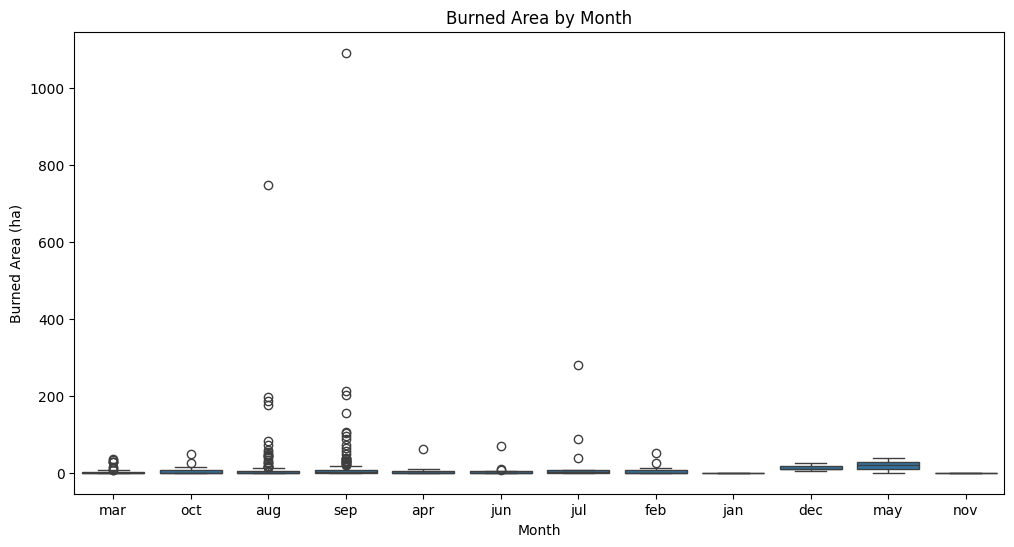

In [12]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='month', y='area', data=data)
plt.title('Burned Area by Month')
plt.xlabel('Month')
plt.ylabel('Burned Area (ha)')
plt.show()

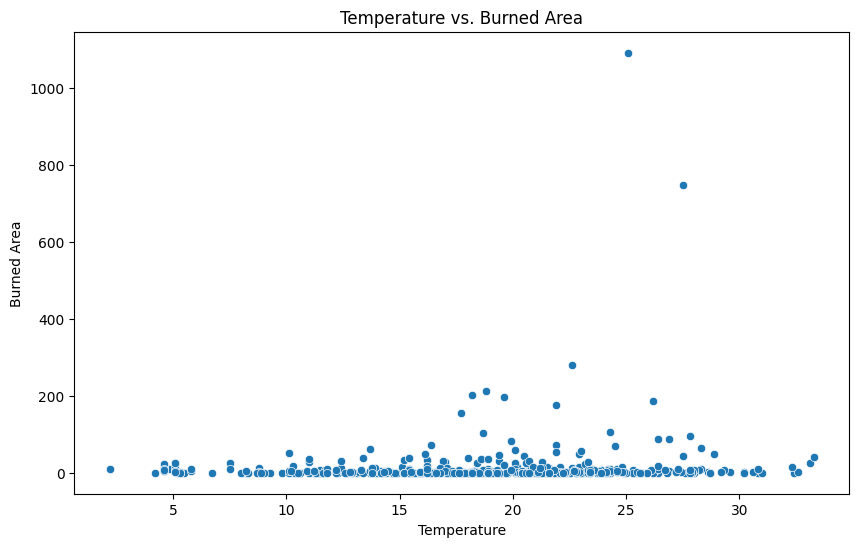

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='area', data=data)
plt.title('Temperature vs. Burned Area')
plt.xlabel('Temperature')
plt.ylabel('Burned Area')
plt.show()

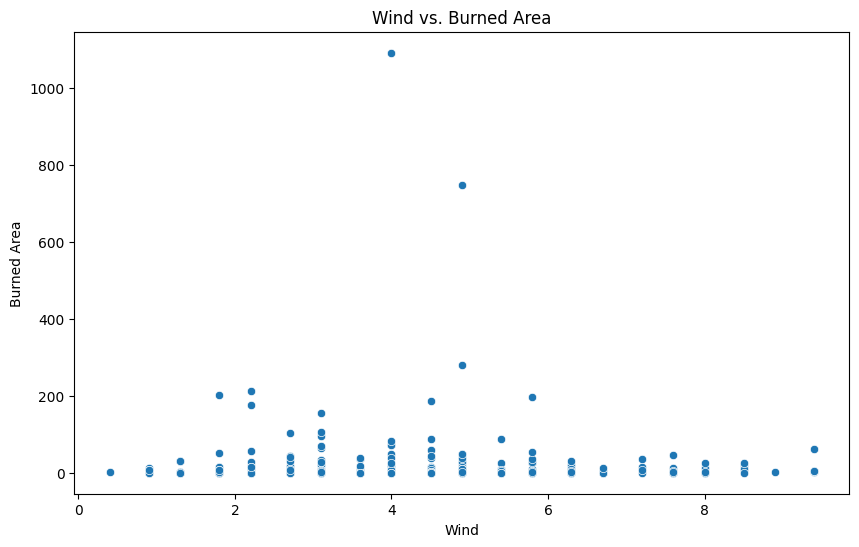

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='wind', y='area', data=data)
plt.title('Wind vs. Burned Area')
plt.xlabel('Wind')
plt.ylabel('Burned Area')
plt.show()

<ipython-input-15-ec62f9ee8cad>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='damage_category', y=feature, data=data, palette='viridis')
<ipython-input-15-ec62f9ee8cad>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='damage_category', y=feature, data=data, palette='viridis')
<ipython-input-15-ec62f9ee8cad>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='damage_category', y=feature, data=data, palette='viridis')


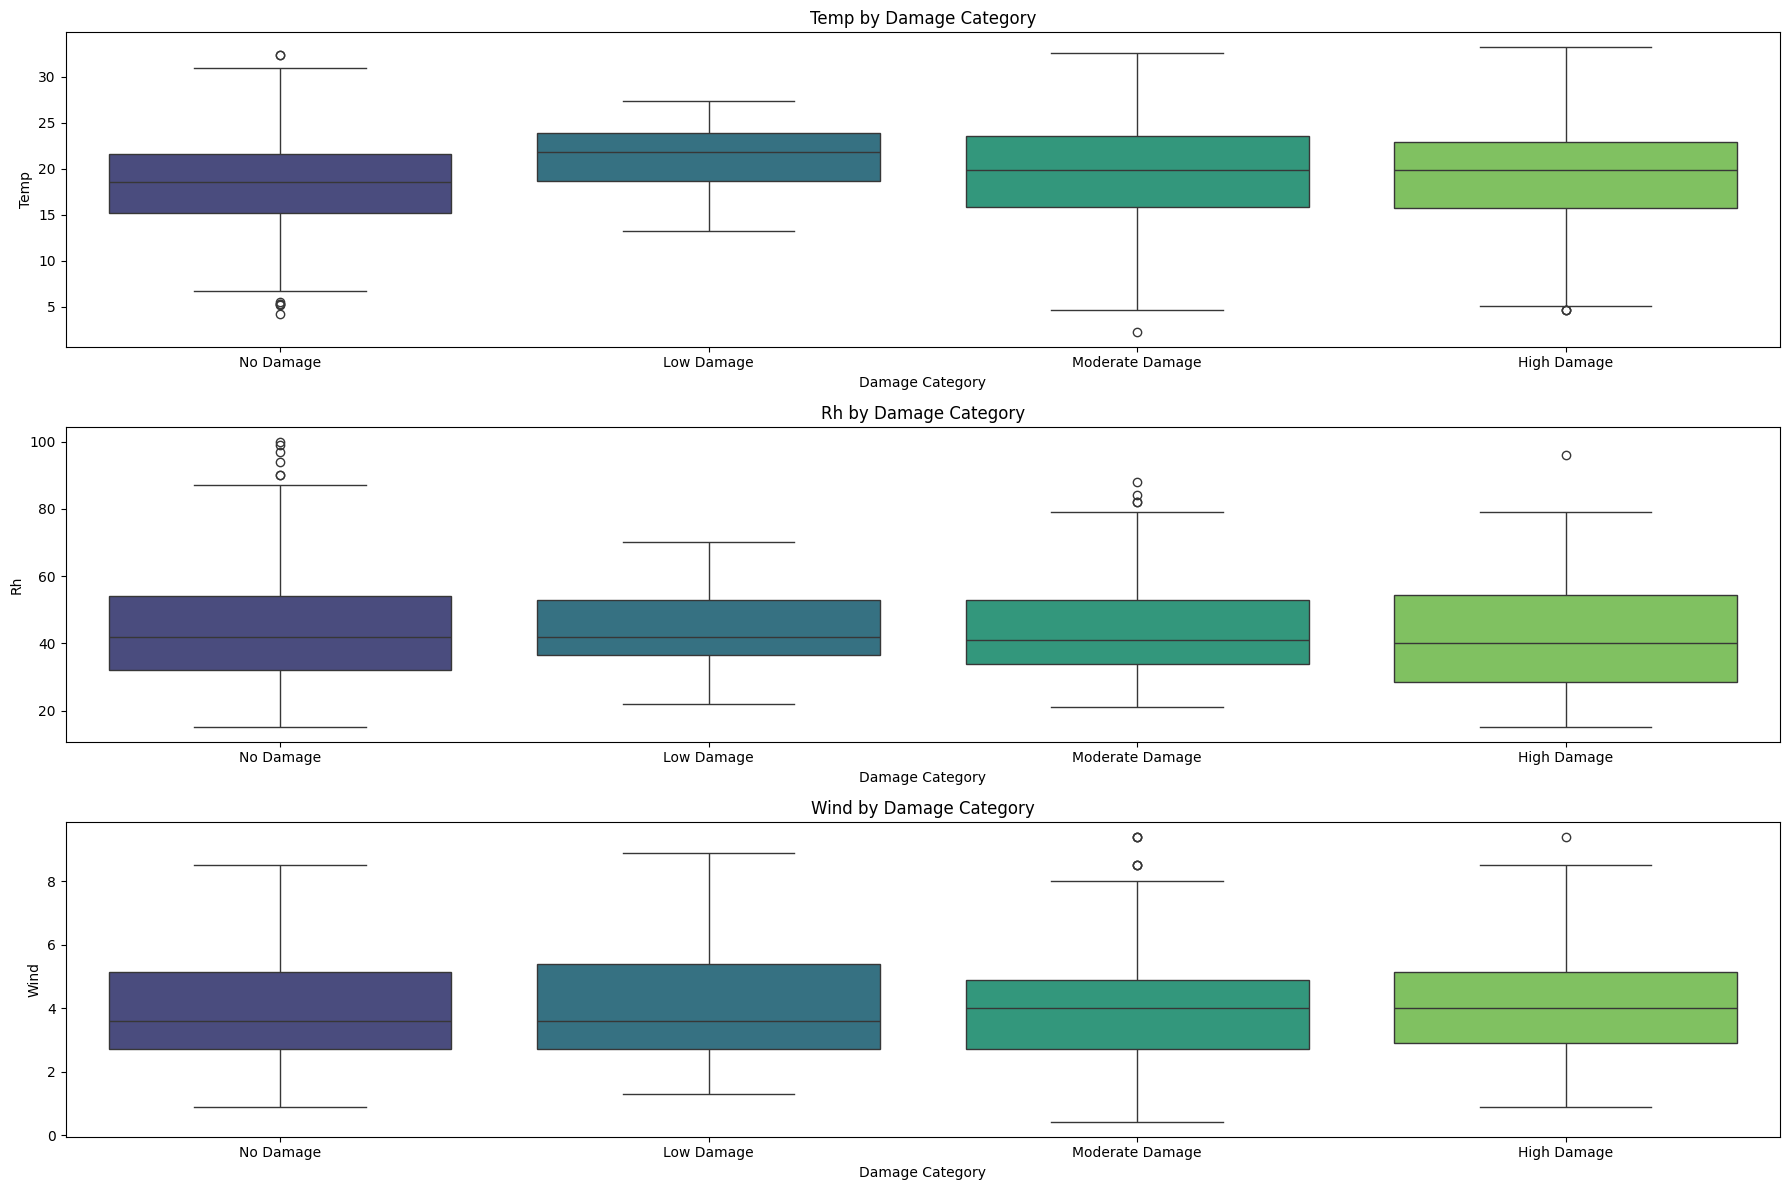

In [15]:
def categorize_damage(area):
    if area == 0:
        return 'No Damage'
    elif area <= 1:
        return 'Low Damage'
    elif area <= 10:
        return 'Moderate Damage'
    else:
        return 'High Damage'


data['damage_category'] = data['area'].apply(categorize_damage)


features = ['temp', 'RH', 'wind']


plt.figure(figsize=(18, 12))

for i, feature in enumerate(features, 1):
    plt.subplot(3, 1, i)
    sns.boxplot(x='damage_category', y=feature, data=data, palette='viridis')
    plt.title(f'{feature.capitalize()} by Damage Category')
    plt.xlabel('Damage Category')
    plt.ylabel(feature.capitalize())

plt.tight_layout()
plt.show()

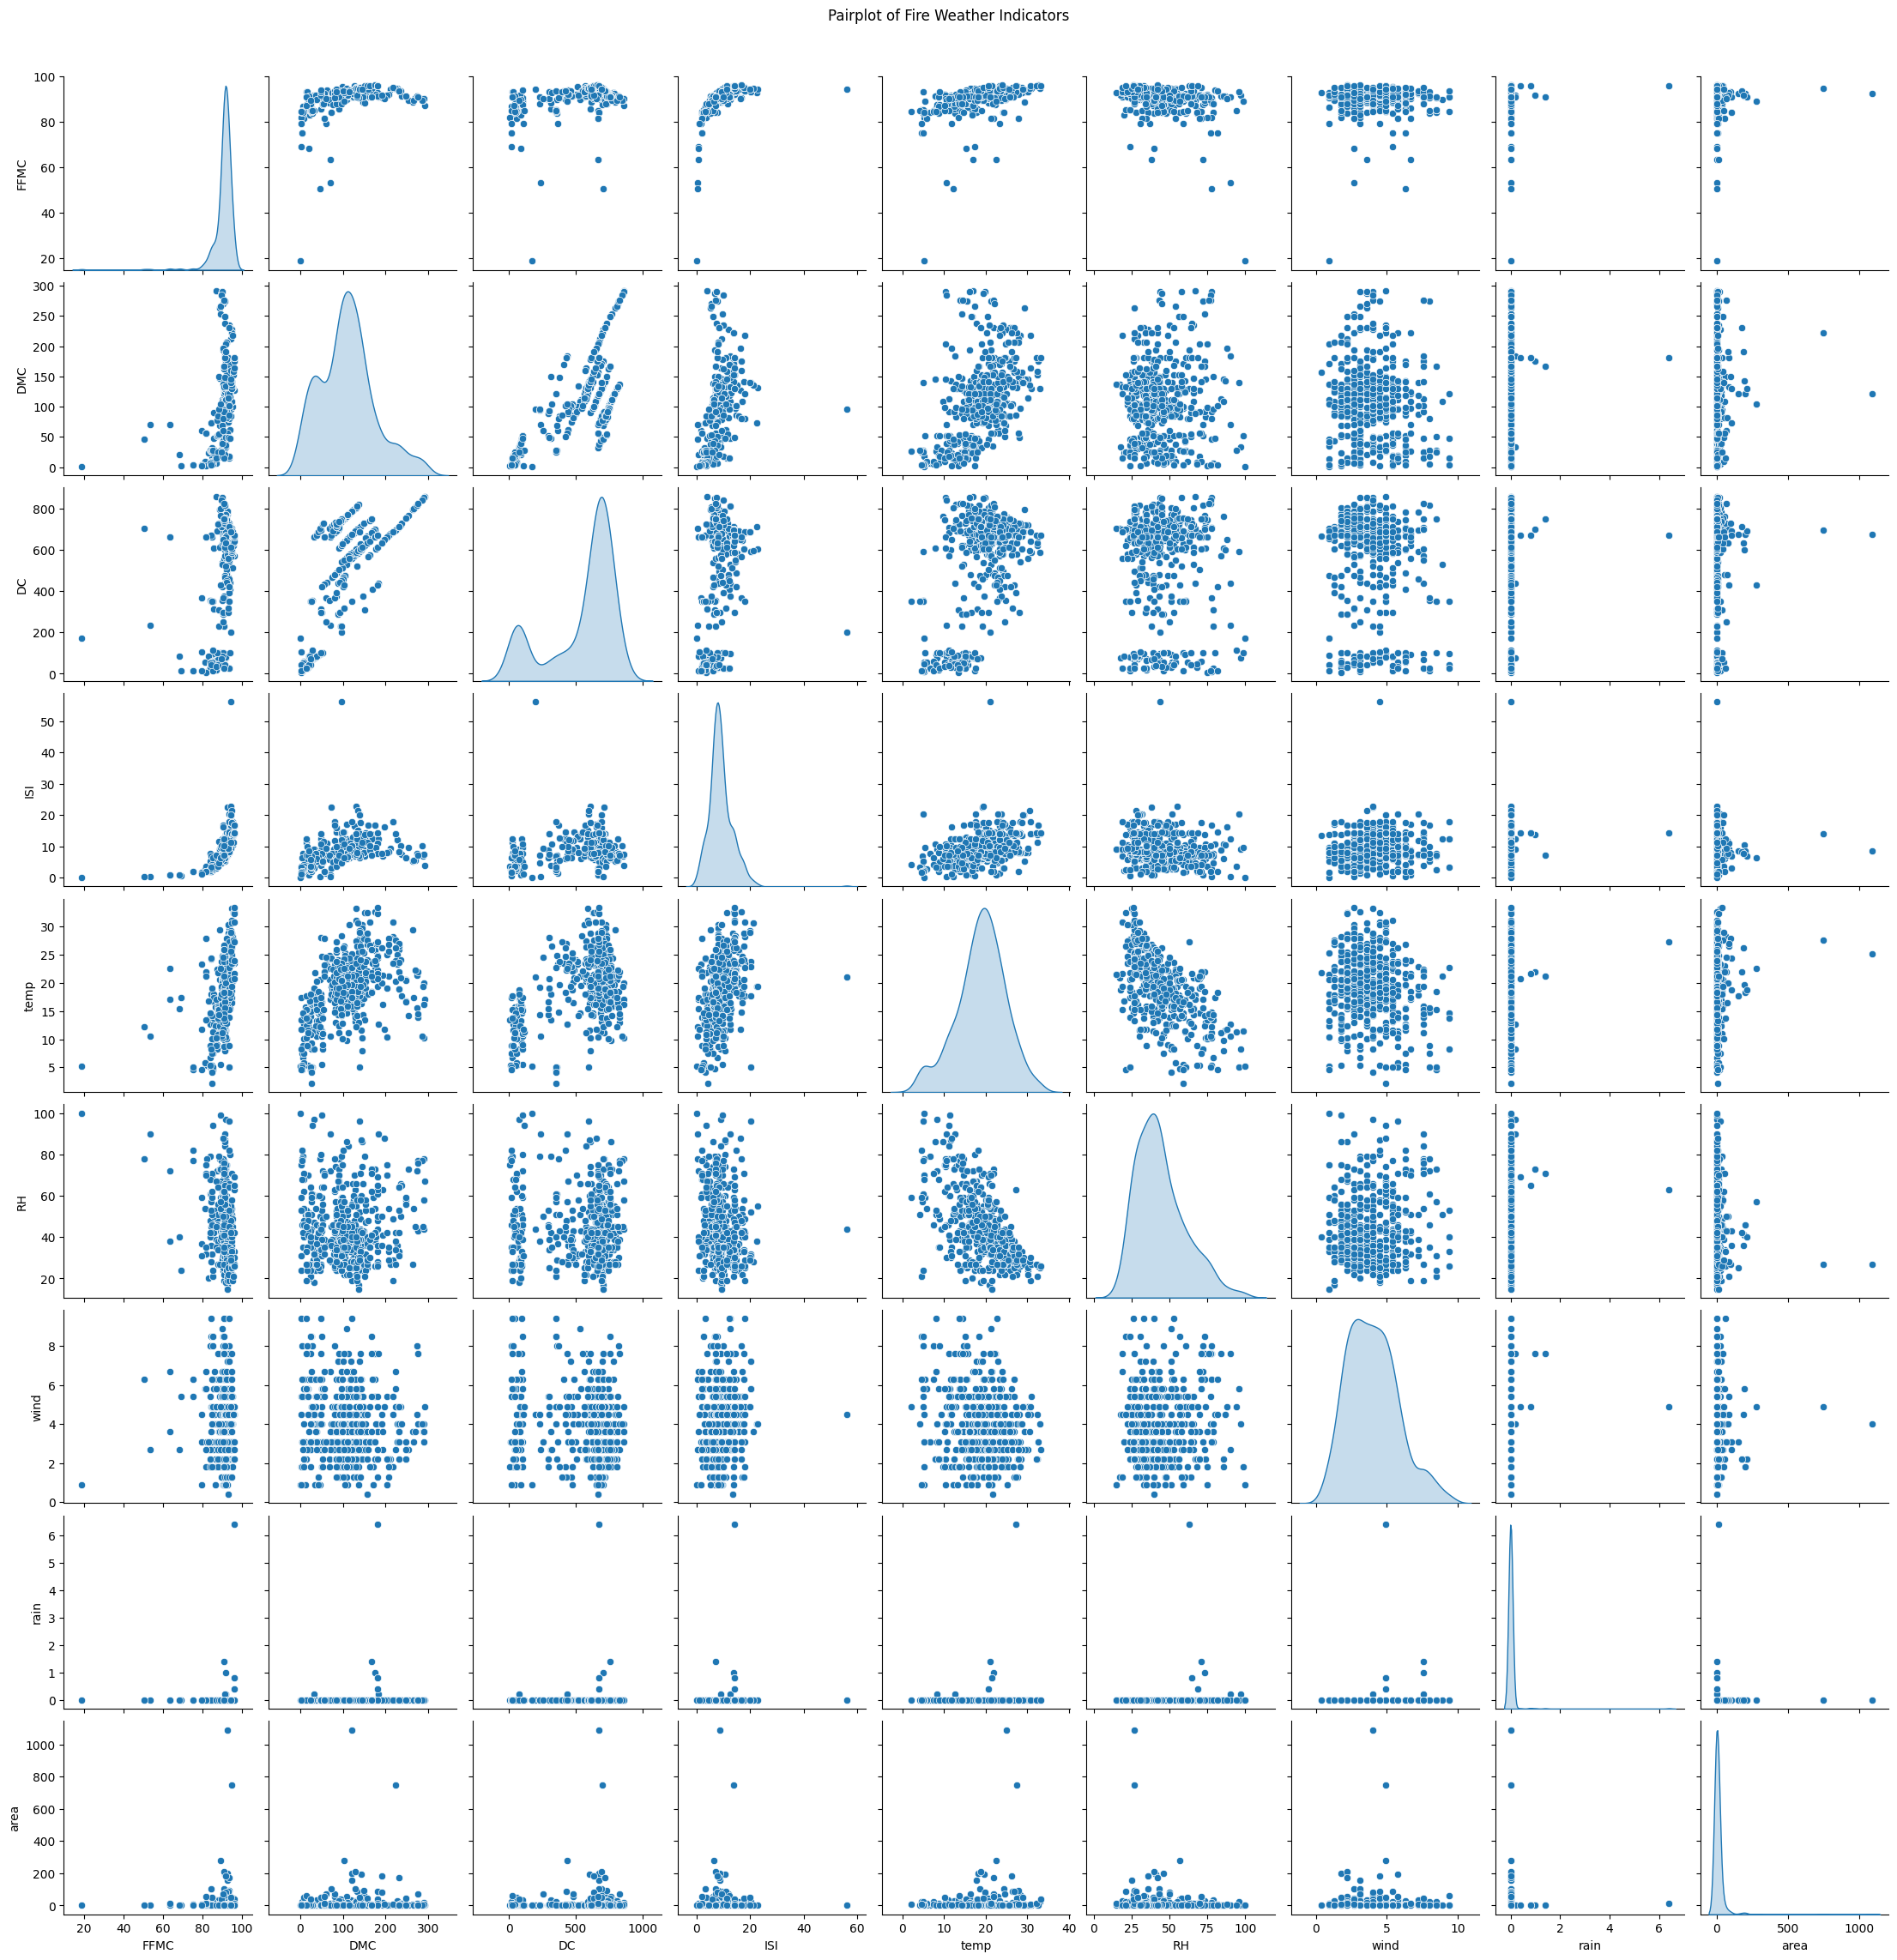

In [16]:
sns.pairplot(data[['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']], diag_kind='kde')
plt.suptitle('Pairplot of Fire Weather Indicators', y=1.02)
plt.show()

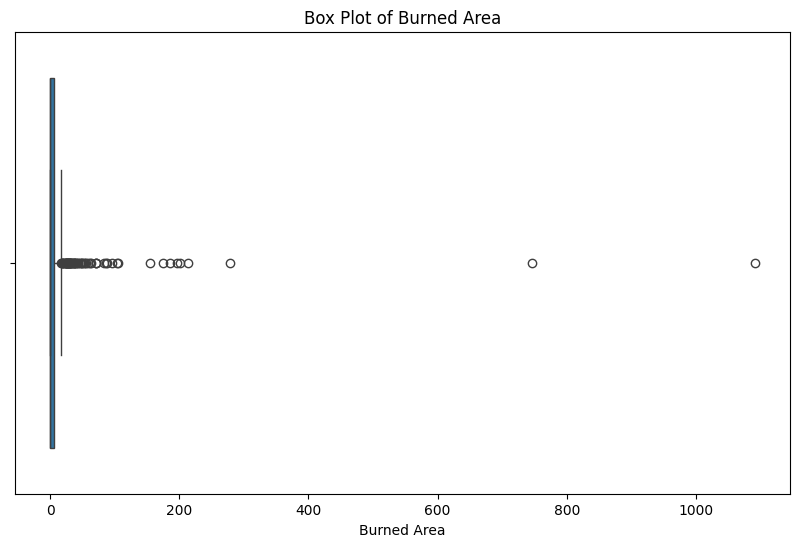

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='area', data=data)
plt.title('Box Plot of Burned Area')
plt.xlabel('Burned Area')
plt.show()

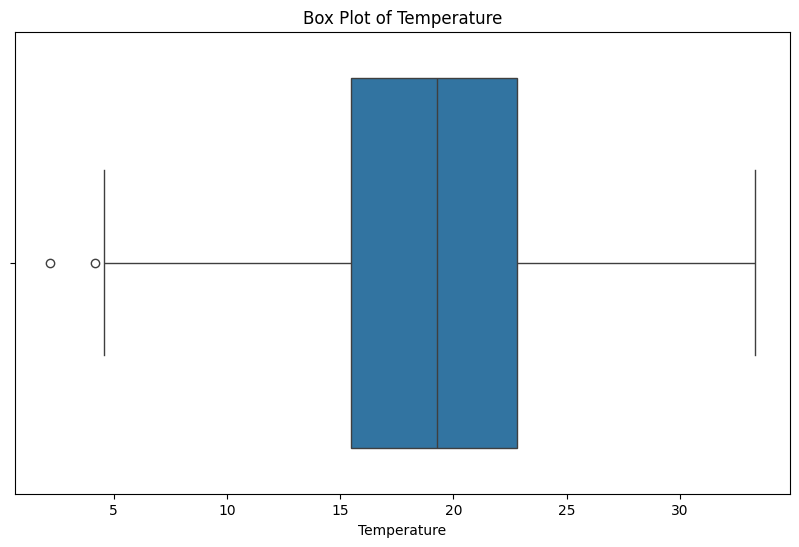

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='temp', data=data)
plt.title('Box Plot of Temperature')
plt.xlabel('Temperature')
plt.show()

In [19]:
data['month'] = data['month'].map({'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12})
data['day'] = data['day'].map({'mon': 1, 'tue': 2, 'wed': 3, 'thu': 4, 'fri': 5, 'sat': 6, 'sun': 7})

# Create a new feature 'is_weekend'
data['is_weekend'] = data['day'].apply(lambda x: 1 if x in [6, 7] else 0)

In [21]:
from sklearn.model_selection import train_test_split
X = data.drop(['area','damage_category'],axis=1)
y = data['area']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.35,random_state=200)

In [22]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [23]:
y_pred = model.predict(X_test)

In [24]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')

Mean Squared Error: 1874.4742310655658
R2 Score: -1.3020131399004637


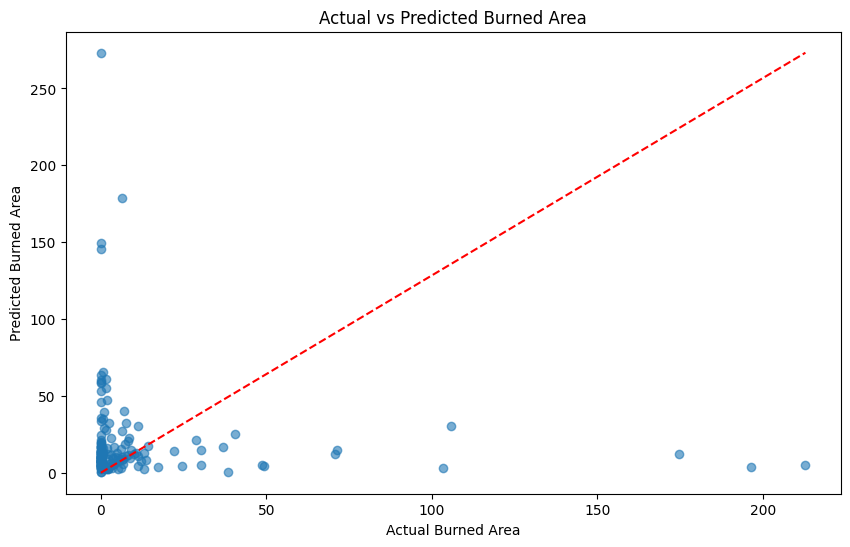

In [25]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel('Actual Burned Area')
plt.ylabel('Predicted Burned Area')
plt.title('Actual vs Predicted Burned Area')
plt.plot([0, max(y_test)], [0, max(y_pred)], color='red', linestyle='--')
plt.show()